In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

run = pd.read_csv('runs.csv')
race = pd.read_csv('races.csv')
run.head(2)

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57


In [23]:
race.head(2)

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,...,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,...,4.0,NaN,12.5,47.0,33.5,NaN,5,23.5,NaN,NaN


In [2]:
run.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79447 entries, 0 to 79446
Data columns (total 37 columns):
race_id            79447 non-null int64
horse_no           79447 non-null int64
horse_id           79447 non-null int64
result             79447 non-null int64
won                79447 non-null float64
lengths_behind     79447 non-null float64
horse_age          79447 non-null int64
horse_country      79445 non-null object
horse_type         79445 non-null object
horse_rating       79447 non-null int64
horse_gear         79447 non-null object
declared_weight    79447 non-null float64
actual_weight      79447 non-null int64
draw               79447 non-null int64
position_sec1      79447 non-null int64
position_sec2      79447 non-null int64
position_sec3      79447 non-null int64
position_sec4      46226 non-null float64
position_sec5      10079 non-null float64
position_sec6      1296 non-null float64
behind_sec1        79447 non-null float64
behind_sec2        79447 non-null f

In [14]:
#Total number of races
len(run.race_id.unique())

6348

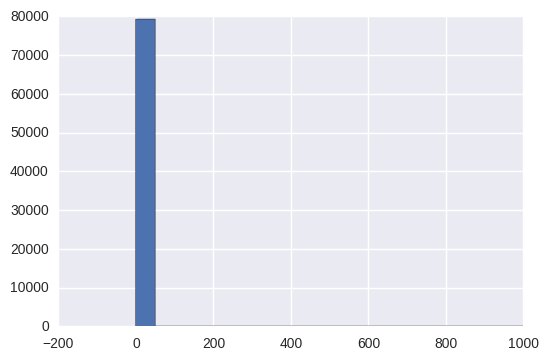

In [15]:
run.lengths_behind.hist(bins=20)
plt.show()

In [16]:
run.lengths_behind.describe()

count    79447.000000
mean         6.108901
std         33.636209
min         -0.500000
25%          1.750000
50%          4.000000
75%          6.750000
max        999.000000
Name: lengths_behind, dtype: float64

This is not reasonable as lengths_behind denotes the distance between that horse and the winner. There should not be a negative number. The max value of 999 is also suspiciously large. A further investigation on them is required

In [17]:
# There are 7 cases with -ve lengths_behind. They all have a result of 2 and 3. They will be further compared
# with the relevant race winners
run[run.lengths_behind<0]

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
5561,447,5,3130,2,0.0,-0.10,3,NZ,Gelding,60,...,23.85,25.51,22.67,NaN,NaN,97.91,2.7,1.5,60,2
13369,1064,11,1168,2,0.0,-0.10,3,NZ,Gelding,60,...,24.28,24.12,23.69,NaN,NaN,101.29,20.0,4.4,132,138
16632,1324,7,289,3,0.0,-0.10,3,USA,Gelding,60,...,24.22,24.87,24.54,NaN,NaN,102.68,4.3,1.7,9,138
20279,1619,6,2672,2,0.0,-0.50,3,AUS,Gelding,60,...,22.41,23.34,23.68,NaN,NaN,83.74,2.7,1.5,29,18
40751,3256,13,795,3,0.0,-0.50,3,NZ,Gelding,60,...,21.75,23.08,23.78,NaN,NaN,82.34,16.0,3.9,63,175
40834,3264,4,1282,2,0.0,-0.25,3,NZ,Gelding,74,...,25.07,25.54,23.05,NaN,NaN,102.41,8.5,2.9,132,64
64023,5116,10,2835,2,0.0,-0.10,3,NZ,Gelding,68,...,22.45,22.17,NaN,NaN,NaN,69.27,6.9,2.0,27,138


In [21]:
run[(run.won == 1)&(run.race_id.isin([447,1064,1324,1619,3256,3264,5116]))]

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
5564,447,8,2414,1,1.0,0.0,3,GB,Gelding,60,...,23.93,25.63,22.43,NaN,NaN,97.91,8.6,2.4,9,25
13366,1064,8,2749,1,1.0,0.0,3,AUS,Gelding,60,...,24.28,24.04,23.49,NaN,NaN,101.29,7.5,2.3,47,26
16629,1324,4,1200,1,1.0,0.0,3,AUS,Gelding,60,...,24.06,24.87,24.19,NaN,NaN,102.69,10.0,2.6,29,154
20281,1619,8,1419,1,1.0,0.0,3,AUS,Mare,60,...,22.41,23.30,23.60,NaN,NaN,83.82,6.8,2.0,117,177
40743,3256,5,4234,1,1.0,0.0,3,AUS,Gelding,60,...,21.87,23.04,23.21,NaN,NaN,82.45,2.1,1.1,137,2
40842,3264,12,3982,1,1.0,0.0,3,IRE,Brown,60,...,25.11,25.42,22.92,NaN,NaN,102.48,5.1,2.0,47,162
64027,5116,14,3754,1,1.0,0.0,3,AUS,Gelding,61,...,22.53,22.33,NaN,NaN,NaN,69.27,2.6,1.3,164,110


From the above it can be seen that for some cases the finish_time of the 2nd/3rd horse is actually lower than the first horse. It can be assumed that lengths_behind is a function of finish_time hence the negative values. In order to fix this the following options are the most trivial:
- drop these races (not only these horses but all the entries with the same race_id)
- swap the positions (Needs further investigation on whether these mistakes are data entry errors or due to other reasons)
- Change the finish_time (Needs to consider how the time should  be changed)

Having considered the above issue it is decided that the entries can be dropped for now. A total of 8 races would be removed from the record. However an inspection has to be carreid out from the race dataframe in order to determine their value. It is because some weathers or track set-up are rarer than the others. If we got rid of the rare cases it might seriously affect model performance.

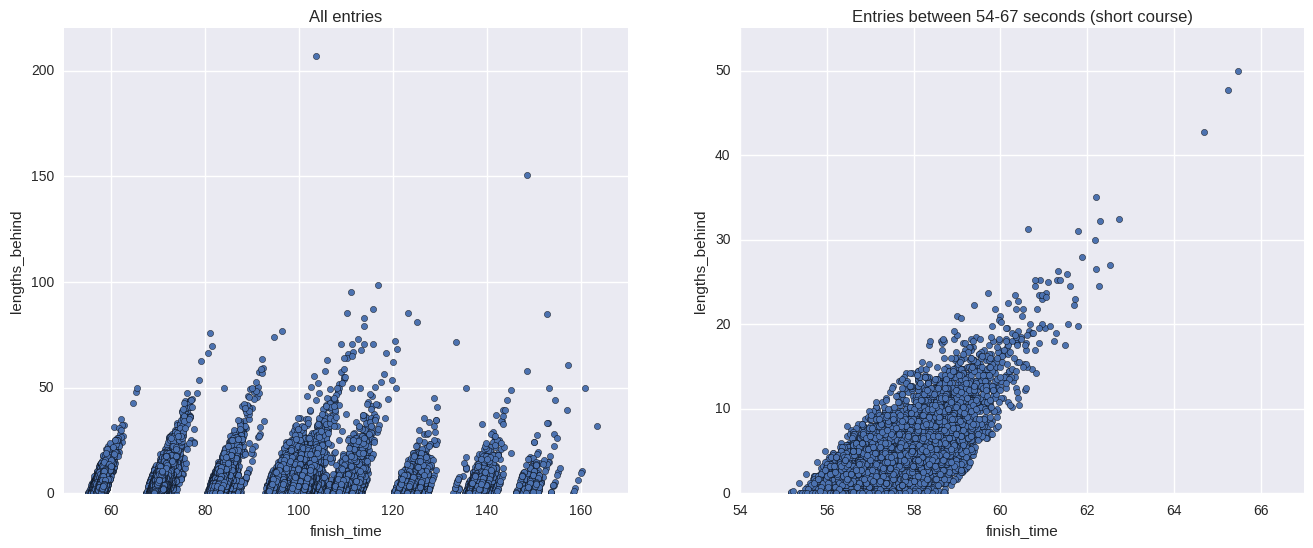

In [41]:
# We can see that length_behind and finish_time have a very linear relationship. The intercept of the plot 
# is believed to be depending on the distance ran
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
run.plot(kind='scatter', x='finish_time', y='lengths_behind',ax=ax1)
ax1.set(xlim=(50,170),ylim=(0,220), title='All entries')
run.plot(kind='scatter', x='finish_time', y='lengths_behind',ax=ax2)
ax2.set(xlim=(54,67),ylim=(0,55), title = 'Entries between 54-67 seconds (short course)')
plt.show()

In [27]:
race[race.race_id.isin([447,1064,1324,1619,3256,3264,5116])][race.columns[2:9]]

,venue,race_no,config,surface,distance,going,horse_ratings
447,ST,6,C+3,0,1600,GOOD TO YIELDING,60-40
1064,HV,1,C+3,0,1650,GOOD,40-10
1324,HV,6,B,0,1650,YIELDING,80-60
1619,ST,1,C+3,0,1400,GOOD TO YIELDING,40-0
3256,ST,11,C+3,0,1400,GOOD,80-60
3264,HV,8,C,0,1650,GOOD,80-60
5116,ST,10,A,0,1200,GOOD TO FIRM,80-60


In [29]:
#Seems that nothing majorly wrong with dropping the data.
run1 = run[-run.race_id.isin([447,1064,1324,1619,3256,3264,5116])]
print run1.shape
print run.shape
#Loosing slightly more than 100 entires seems reasonable

(79357, 37)
(79447, 37)


Coming up next is the investigation of the entreis with exceptionally high lengths_behind value

In [31]:
run[run.lengths_behind>200].shape

(90, 37)

In [32]:
# Surprisingly there are 90 entries. The head of this result is printed below
run[run.lengths_behind>200].head()

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
9,0,10,2998,14,0.0,999.0,3,AUS,Mare,60,...,22.31,24.38,30.46,NaN,NaN,92.20,39.0,12.0,109,145
114,8,8,303,14,0.0,999.0,3,GB,Brown,60,...,22.96,23.84,26.68,NaN,NaN,87.99,60.0,12.0,54,38
607,49,10,2395,14,0.0,999.0,3,NZ,Gelding,60,...,22.47,24.62,NaN,NaN,NaN,64.31,60.0,15.0,29,18
751,61,11,2434,12,0.0,999.0,3,AUS,Gelding,60,...,22.74,27.00,NaN,NaN,NaN,73.38,72.0,18.0,75,155
800,65,12,4034,14,0.0,999.0,3,NZ,Gelding,60,...,22.65,23.80,28.95,NaN,NaN,89.68,99.0,33.0,54,34


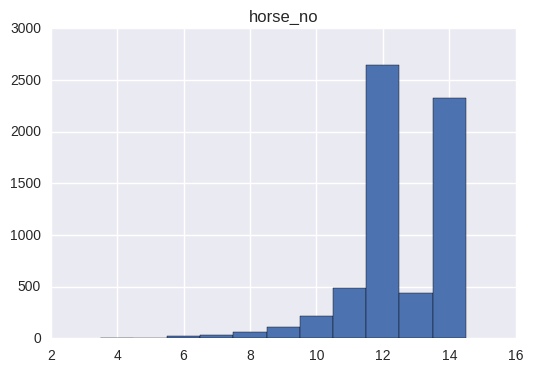

In [3]:
# The following plot shows why the larger the horse number the lower the average position (found during race eda). 
# This is because not all races have 14 horses!
pd.pivot_table(run, index=['race_id'], values=['horse_no'], aggfunc='count').hist(bins=np.linspace(3.5,14.5,12))
plt.show()

In [11]:
# It can be seen that most horses belong to the type Gelding which is a lot more than Horse and Brown 
# i.e. the second and third place respectively
run[['horse_id', 'horse_type']].drop_duplicates().horse_type.value_counts()

Gelding    4001
Horse       140
Brown       127
Colt         89
Mare         39
Filly        18
Rig          17
Roan          5
Grey          1
Name: horse_type, dtype: int64